In [1]:
import pandas as pd
import numpy as np
import osmnx as ox
import os
import folium
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 20)
project_dir = os.path.join(os.path.expanduser('~'), 'Documents', 'mapdescriptor')
concat = os.path.join

In [2]:
north = -6.9875
west = -37.3303
south = -7.0882
east = -37.2215
pois = ox.geometries.geometries_from_bbox(north, south, east, west, tags={'amenity':True})
pois = pois[['amenity', 'name', 'geometry', 'opening_hours']]
pois

amenity                        name  \
element_type osmid                                                      
node         1798496605              fuel                 Posto Viola   
             1798496642              taxi  Moto táxi Praça dos Pombos   
             1798525769              taxi       Táxi Rodoviária Velha   
             1798525772              taxi    Táxi Fórum Miguel Sátiro   
             1798919196               bar                 Bar do Rock   
...                                   ...                         ...   
way          1084925006  place_of_worship                         NaN   
             1085721565  place_of_worship    Capela da Cruz da Menina   
             1098137716            school                         NaN   
             1112595201  place_of_worship                         NaN   
relation     7375603          marketplace             Mercado Público   

                                                                  geometry  \
element_type osmid                                                           
node         1798496605                         POINT (-37.27847 -7.02390)   
             1798496642                         POINT (-37.27843 -7.02361)   
             1798525769                         POINT (-37.27735 -7.02265)   
             1798525772                         POINT (-37.27702 -7.02601)   
             1798919196                         POINT (-37.27702 -7.02204)   
...                                                                    ...   
way          1084925006  POLYGON ((-37.27436 -7.00392, -37.27443 -7.003...   
             1085721565  POLYGON ((-37.30224 -7.00568, -37.30223 -7.005...   
             1098137716  POLYGON ((-37.27944 -7.06101, -37.27924 -7.060...   
             1112595201  POLYGON ((-37.23823 -7.06129, -37.23823 -7.061...   
relation     7375603     POLYGON ((-37.27953 -7.02765, -37.27953 -7.027...   

                                                      opening_hours  
element_type osmid                                                   
node         1798496605                                         NaN  
             1798496642                                         NaN  
             1798525769                                         NaN  
             1798525772                                         NaN  
             1798919196  We-Su 19:00-02:00+; week 25-26 18:00-04:00  
...                                                             ...  
way          1084925006                                         NaN  
             1085721565                                         NaN  
             1098137716                                         NaN  
             1112595201                                         NaN  
relation     7375603                              Mo-Sa 07:00-17:00  

[829 rows x 4 columns]

In [3]:
def get_coordinates(point):
    if type(point) == 'shapely.geometry.point.Point':
        lng, lat = point.coords[0]
    else:
        lng, lat = point.centroid.coords[0]
    return lng, lat


In [4]:
# choose the tile for map:
# https://leaflet-extras.github.io/leaflet-providers/preview/

In [5]:
#folium.Map(location=[-7.03, -37.28], tiles='cartodbpositronnolabels', zoom_start=14)

In [6]:
amenities = pois.amenity.value_counts().index.values.tolist()
amenities[0:5]

['parking', 'fast_food', 'bar', 'restaurant', 'bench']

In [7]:
# https://www.sjjb.co.uk/mapicons/downloads
# https://github.com/openstreetmap/map-icons
# https://wiki.openstreetmap.org/wiki/Map_features
# https://wiki.openstreetmap.org/wiki/Map_Icons#Internal_Icon_collections
# https://leaflet-extras.github.io/leaflet-providers/preview/

In [8]:
# https://wiki.openstreetmap.org/wiki/Key:amenity

In [9]:
# # Creating Basemap
# fig4=Figure(height=350,width=550)
# m4=folium.Map(location=[28.4911091,77.0867361],tiles='cartodbpositron',zoom_start=11)
# fig4.add_child(m4)

# # Adding Custom Markers
# folium.Marker(location=[28.4211091,77.0267361],popup='Custom Marker 1',tooltip='<strong>Click here to see Popup</strong>',icon=folium.Icon(color='red',icon='none')).add_to(m4)
# folium.Marker(location=[28.4411091,77.1167361],popup='Custom Marker 2',tooltip='<strong>Click here to see Popup</strong>',icon=folium.Icon(color='green',prefix='glyphicon',icon='off')).add_to(m4)
# folium.Marker(location=[28.4511091,77.1667361],popup='Custom Marker 3',tooltip='<strong>Click here to see Popup</strong>',icon=folium.Icon(color='purple',prefix='fa',icon='anchor')).add_to(m4)
# folium.Marker(location=[28.4911091,77.0867361],popup='Custom Marker 4- <b>Analytics Vidhya</b>',tooltip='<strong>Click here to see Popup</strong>',icon=folium.features.CustomIcon('av.png',icon_size=(50,50))).add_to(m4)


In [10]:
lats = dict()
lngs = dict()
for amenity in amenities:
    lngs[amenity], lats[amenity] = zip(*pois.loc[pois['amenity']==amenity]['geometry'].apply(get_coordinates).values)

In [11]:
# !pip install CairoSVG
# !pip install pipwin
# !pipwin install cairocffi

In [12]:
from cairosvg import svg2png

for amenity in amenities:
    with open(concat(project_dir, 'icons', 'amenities', f'{amenity}.svg')) as f:
        svg_code = f.read()
    svg2png(bytestring=svg_code, write_to = concat(project_dir, 'icons', 'amenities', f'{amenity}.png') )


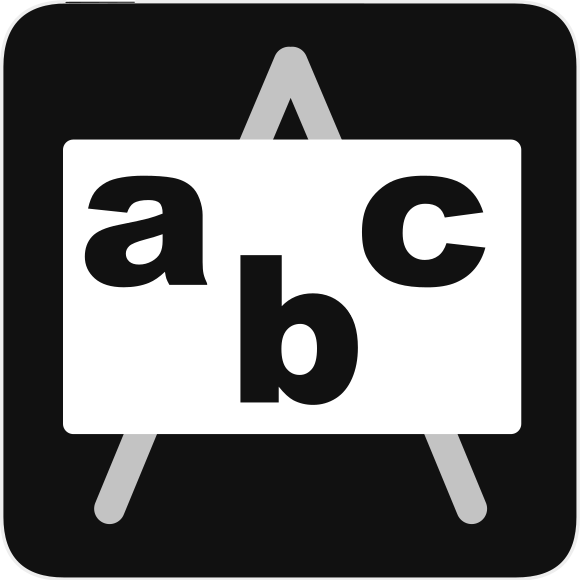
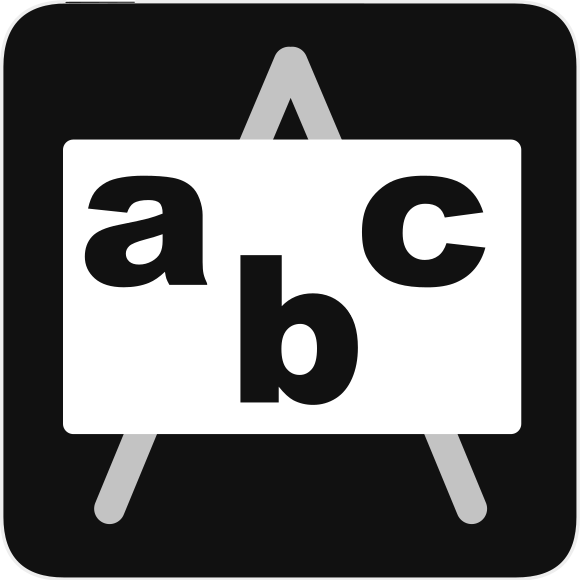
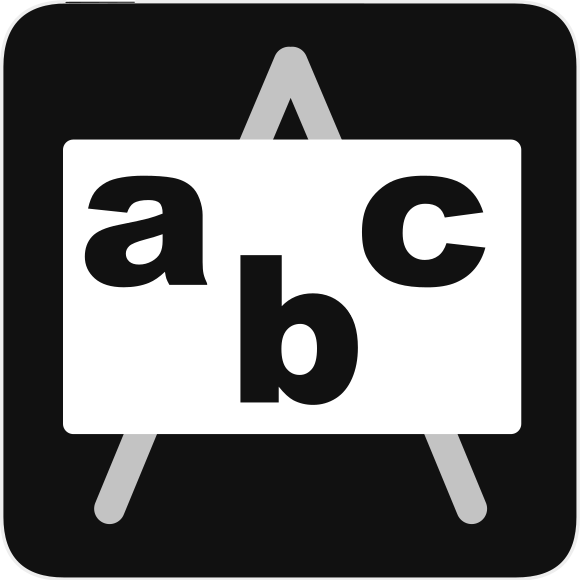
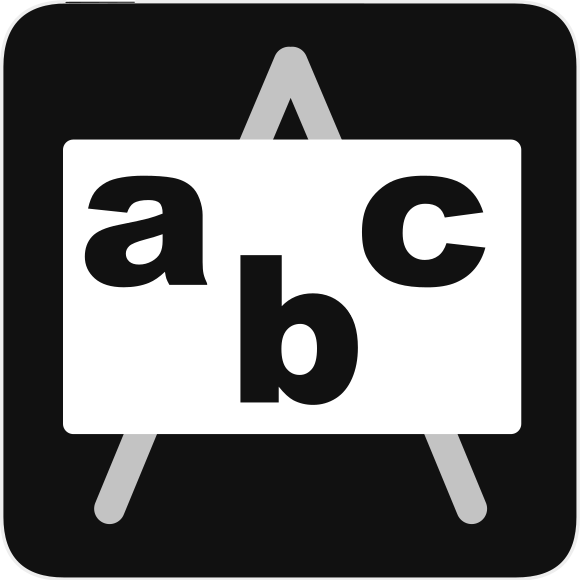
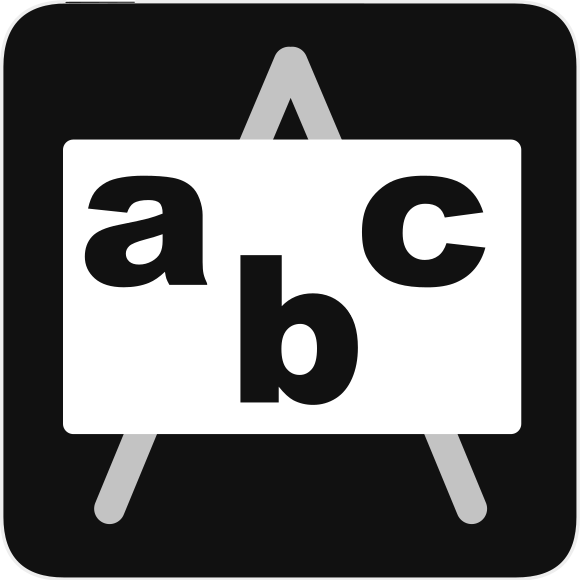
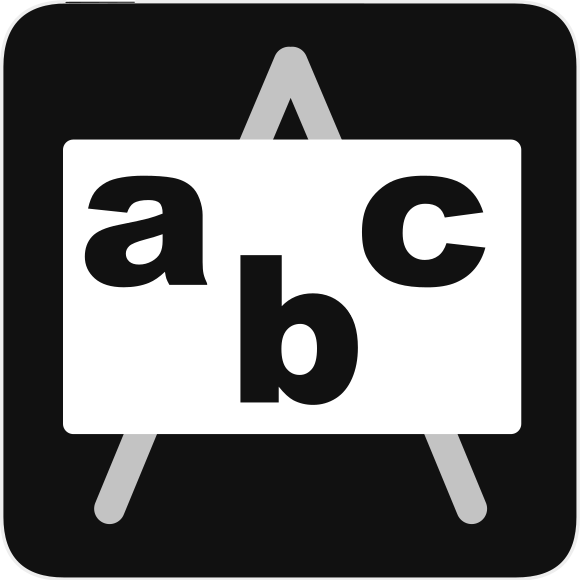
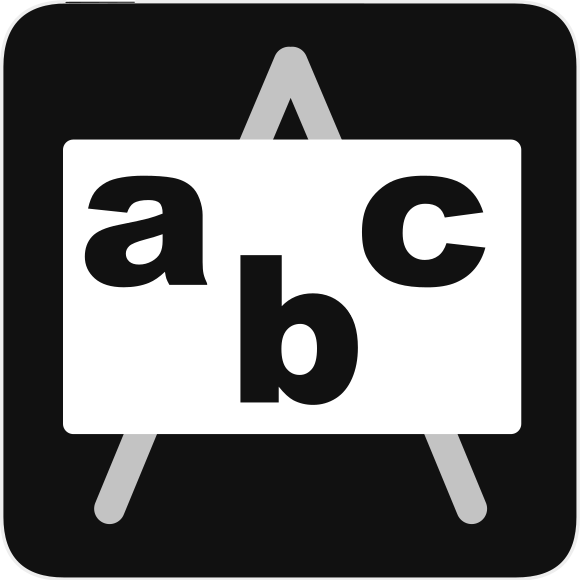
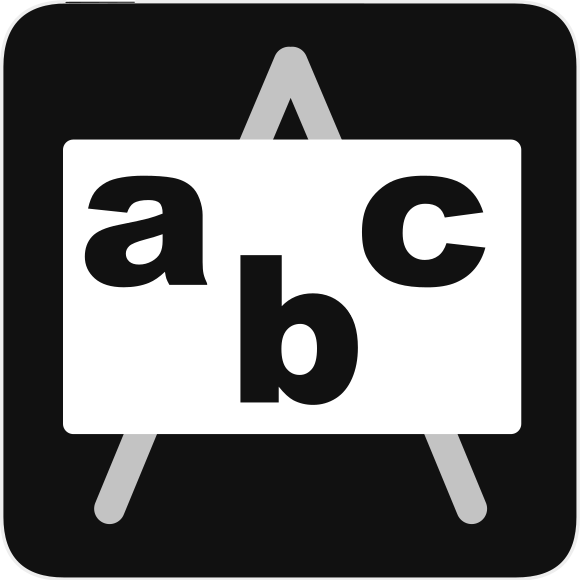
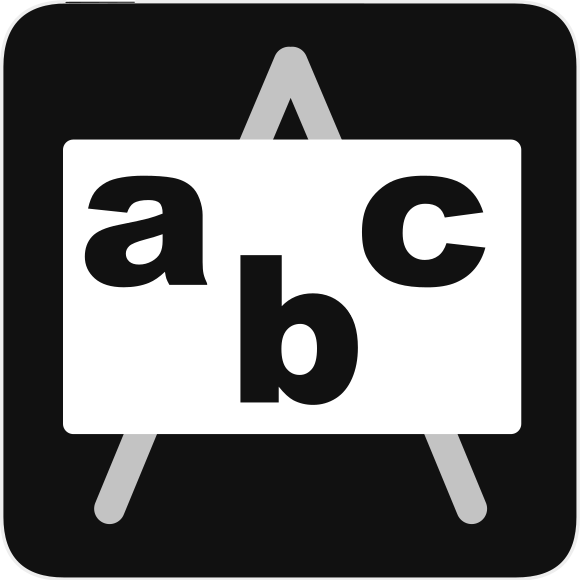
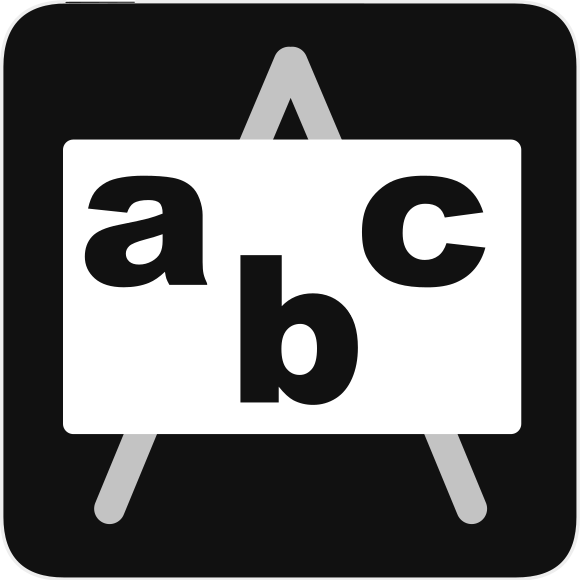
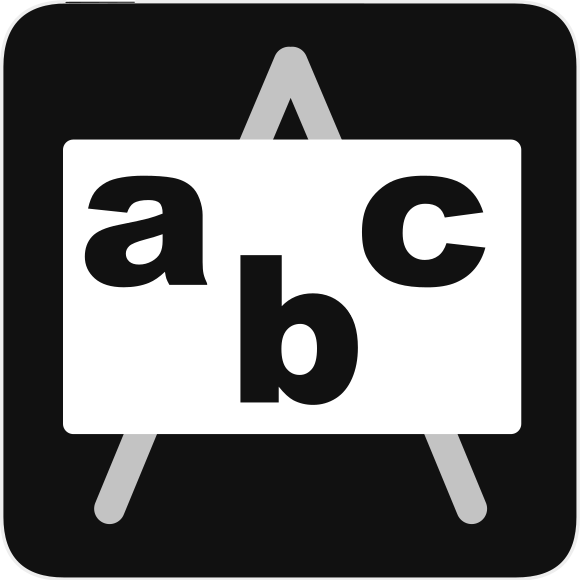
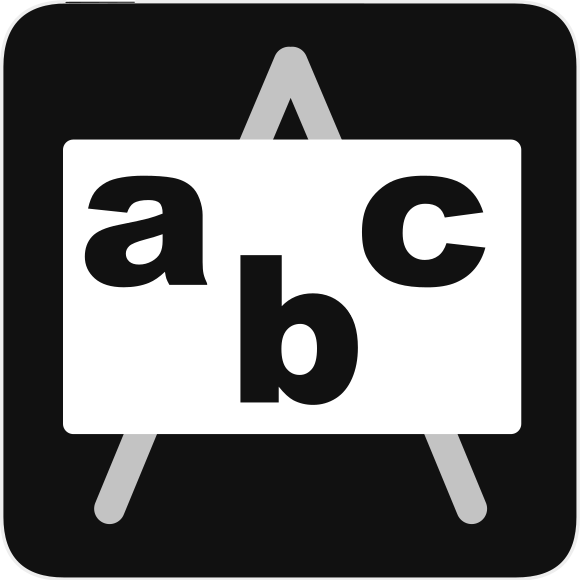
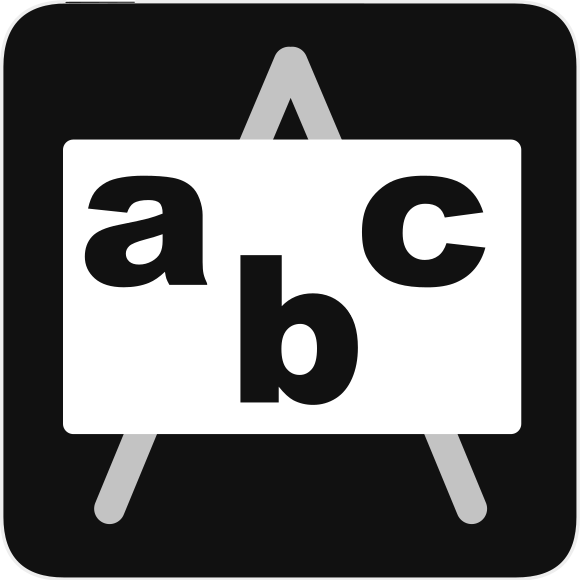
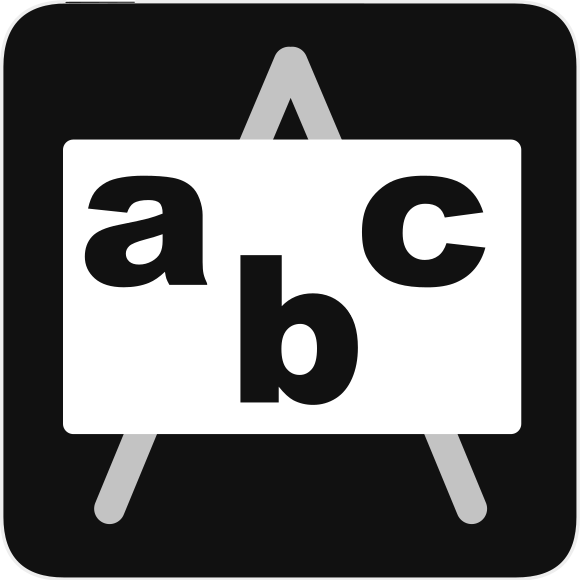
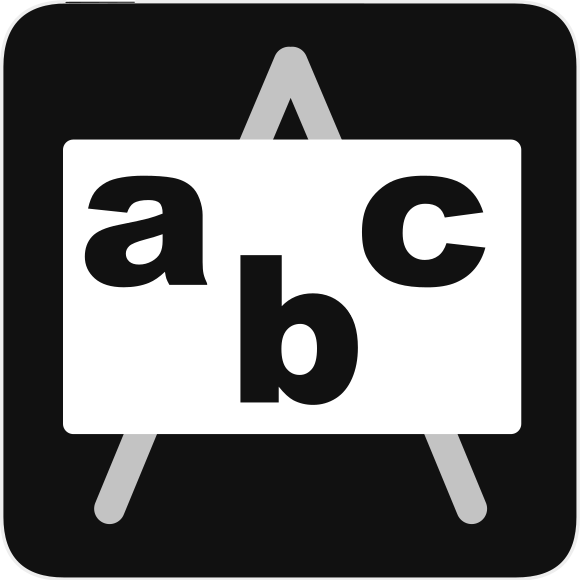
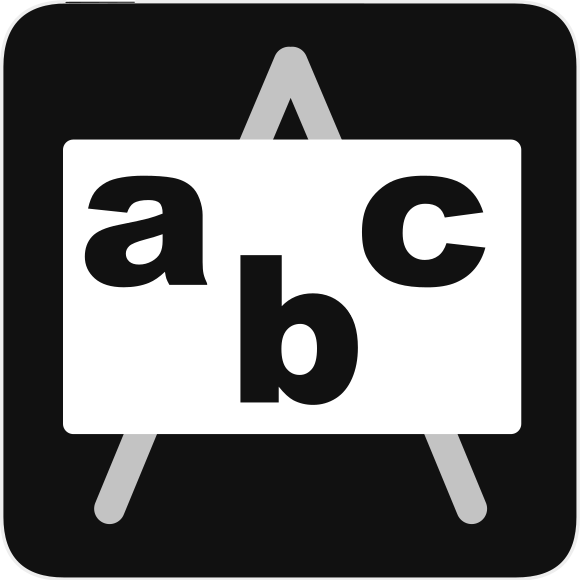
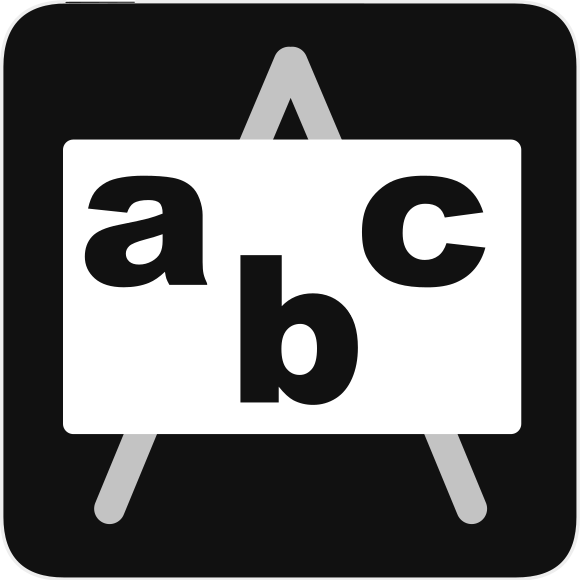
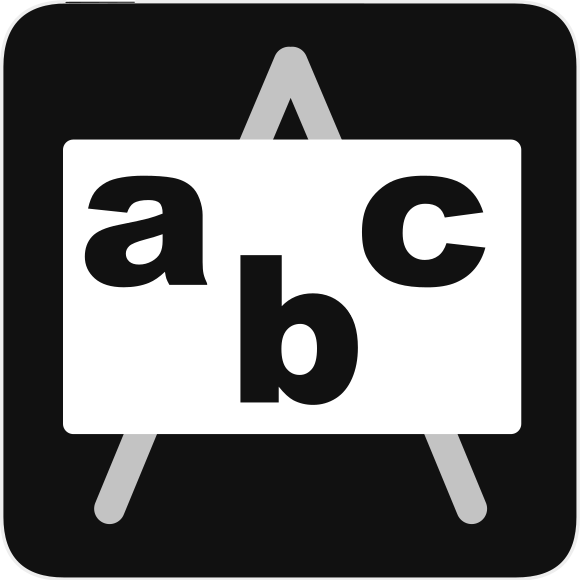
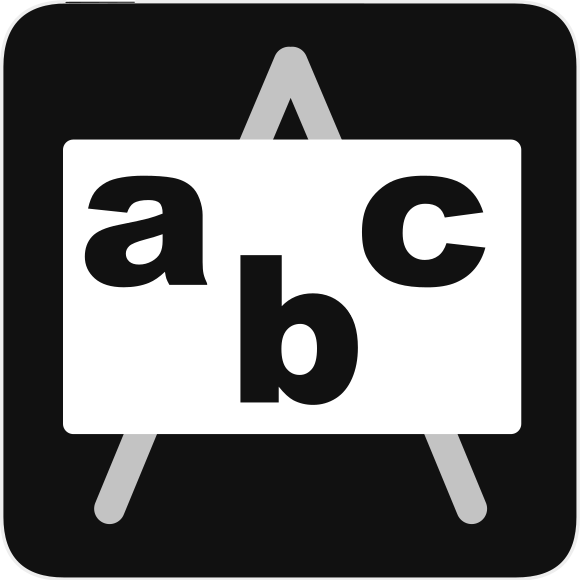
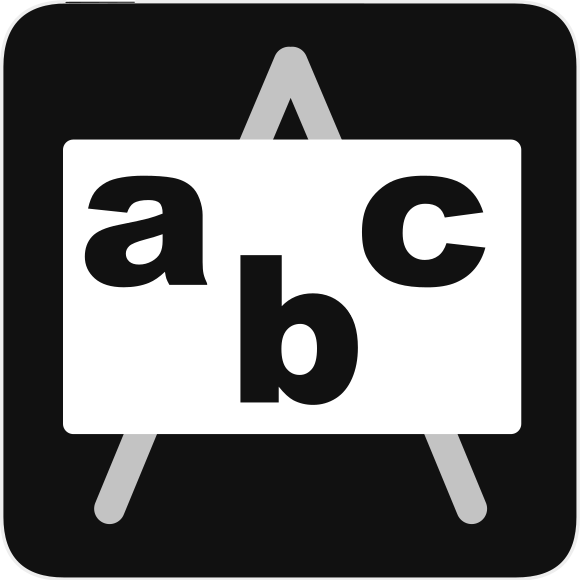
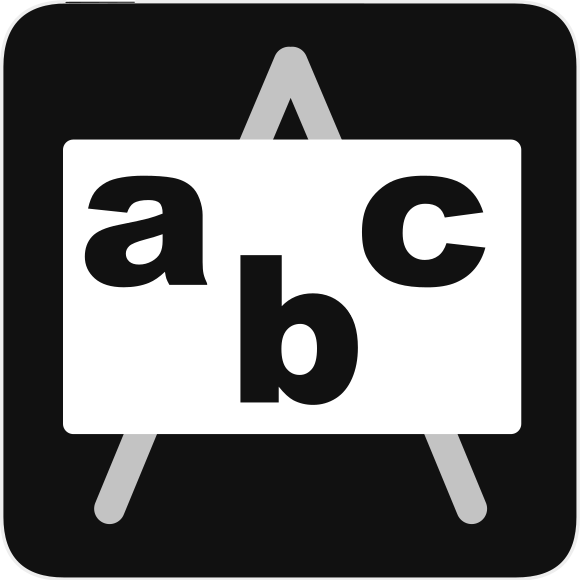
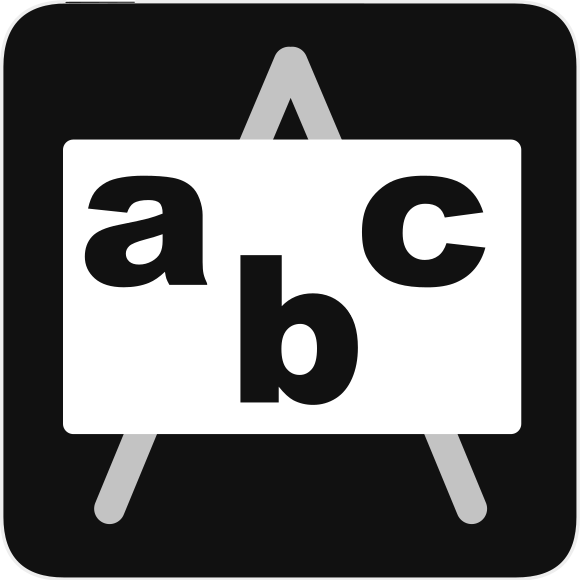
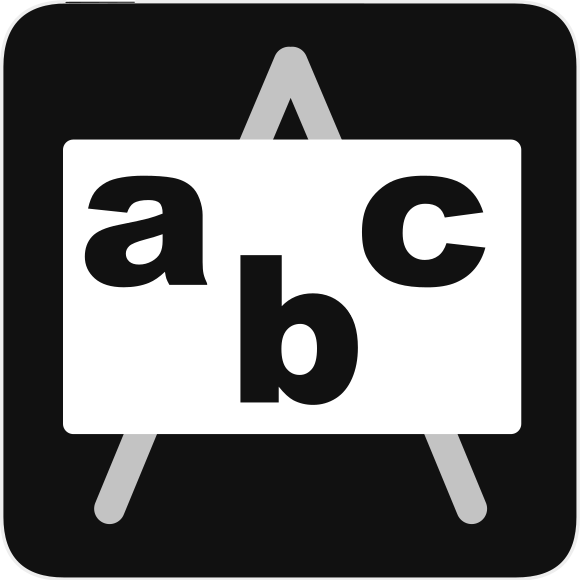
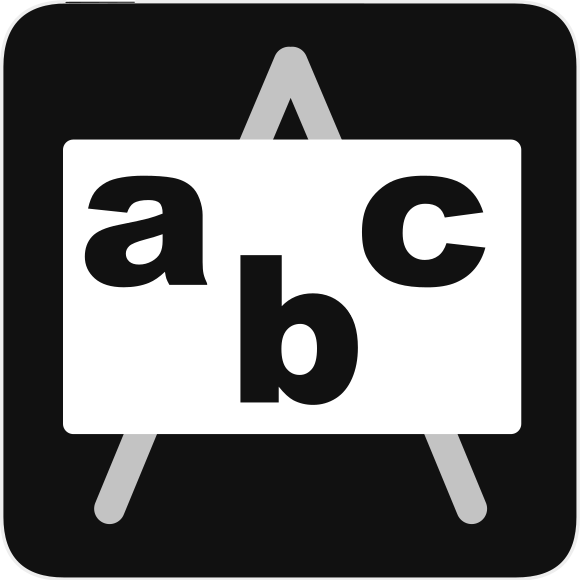
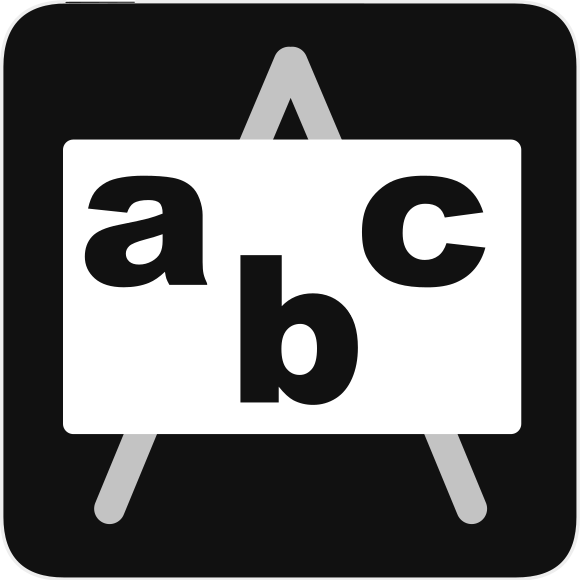
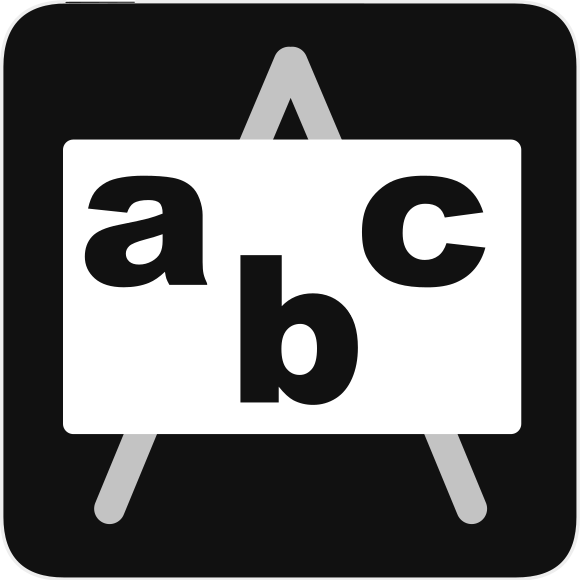
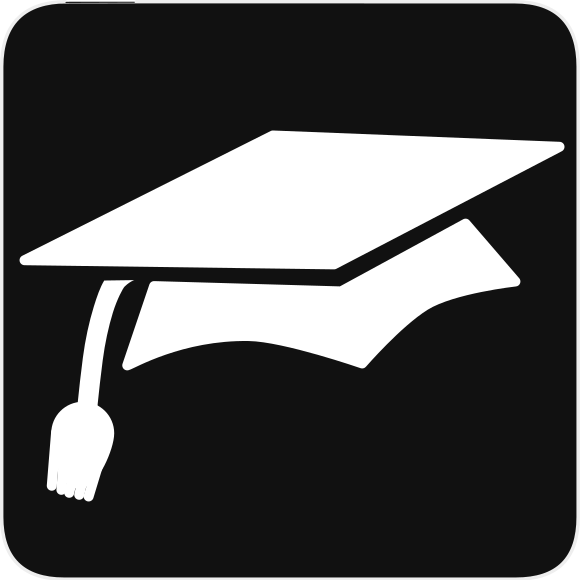
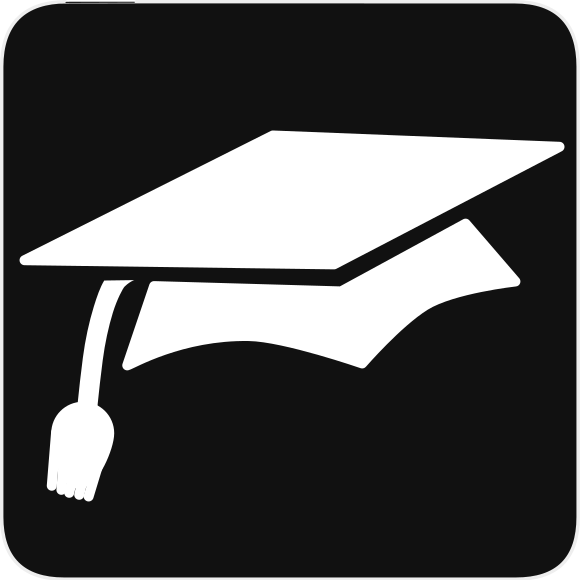
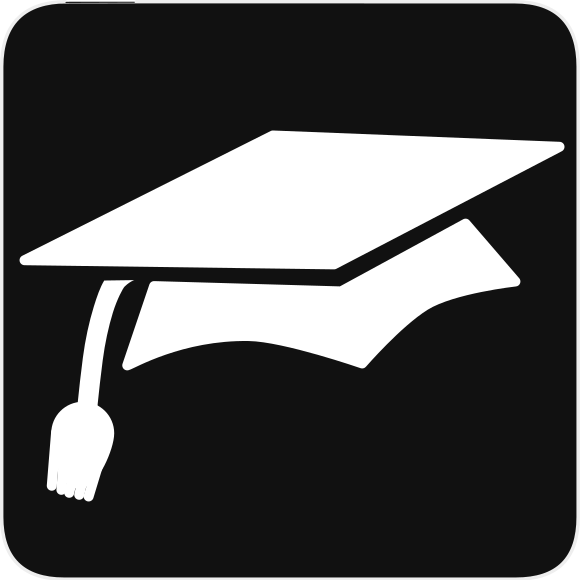
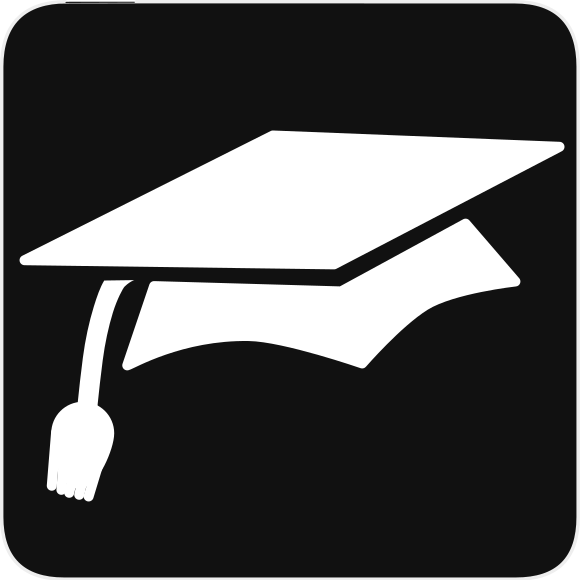
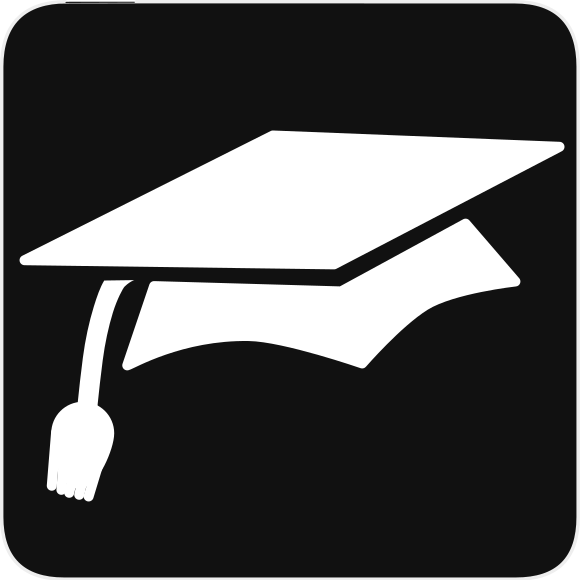
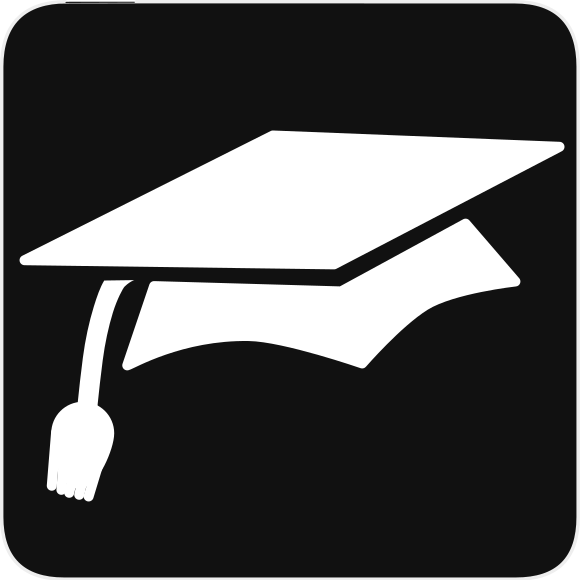
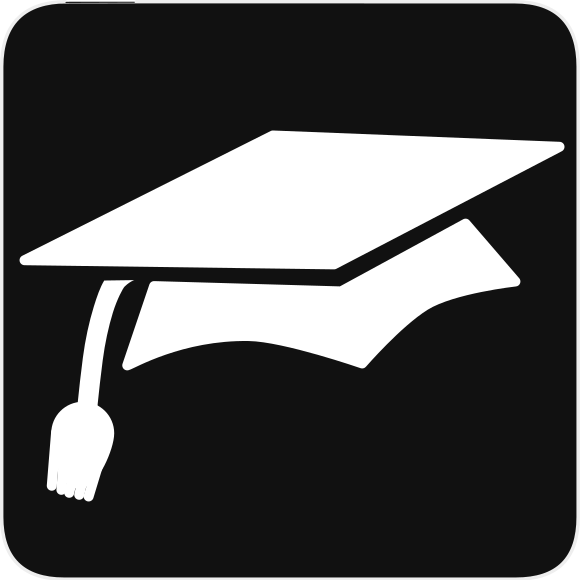
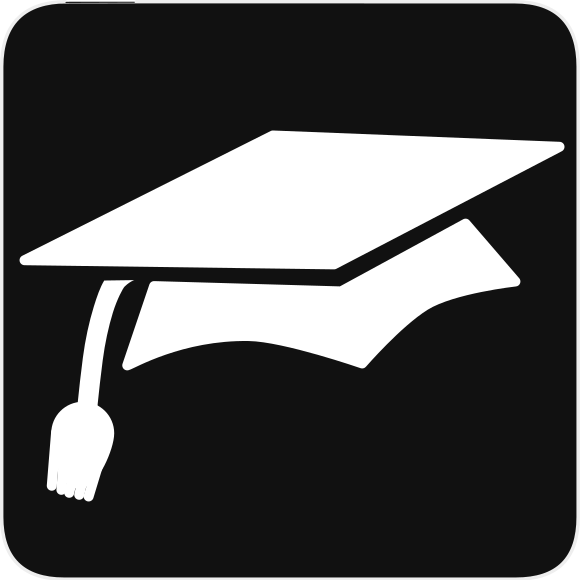
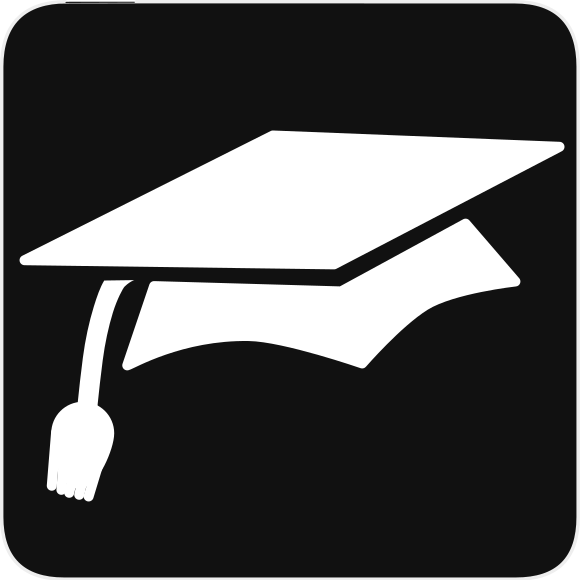
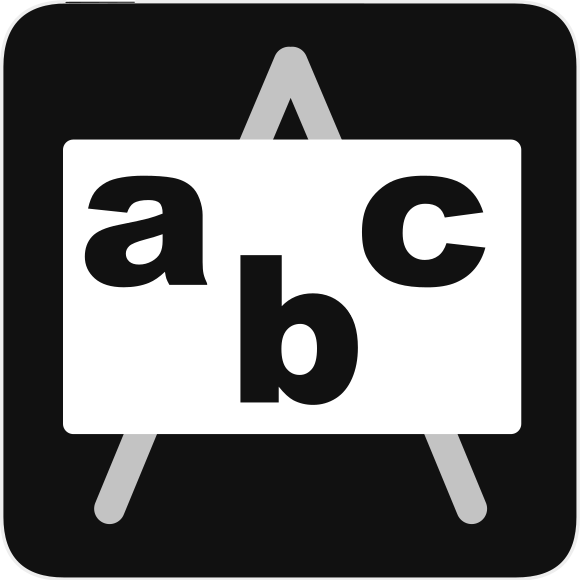
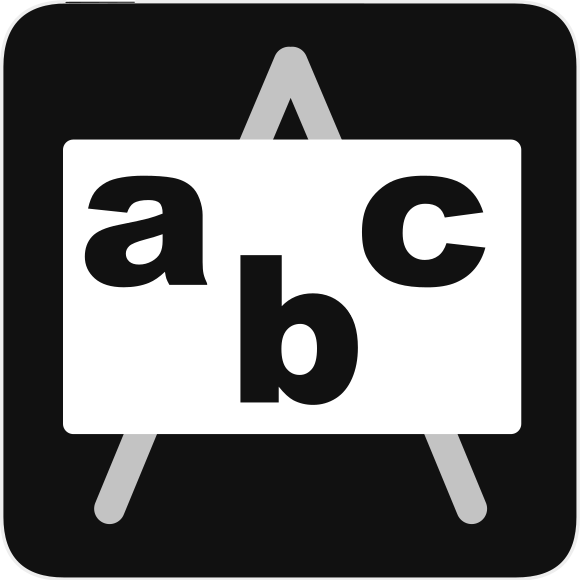
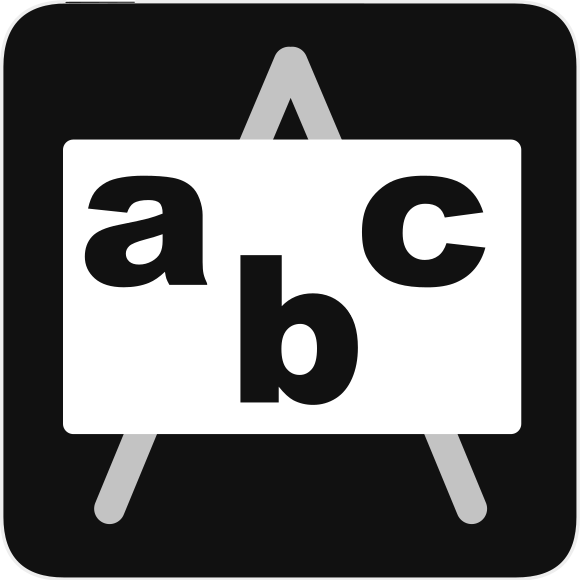
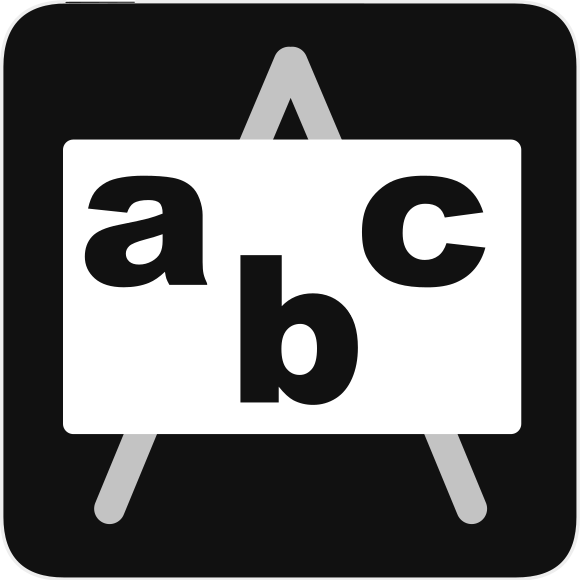
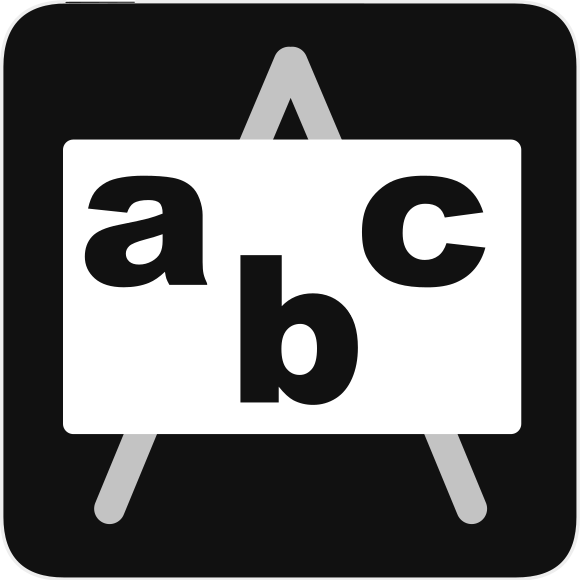
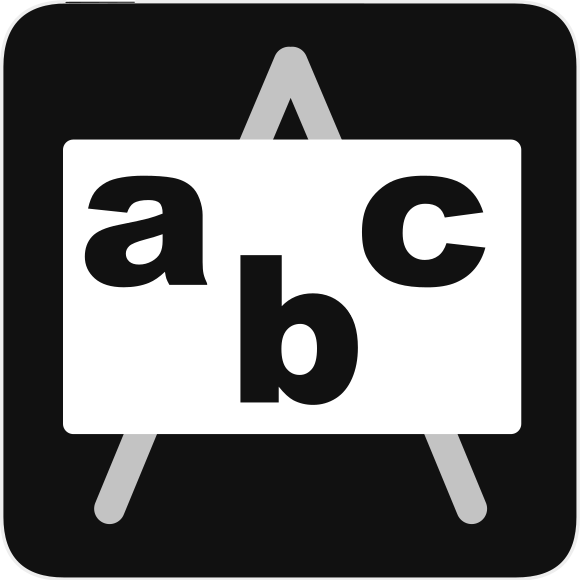
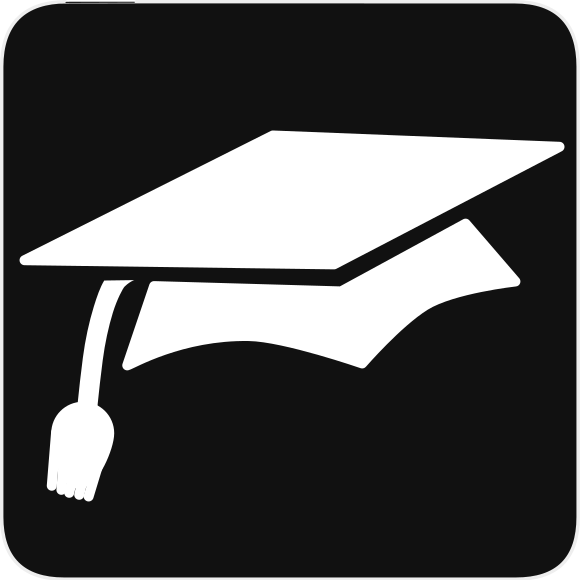
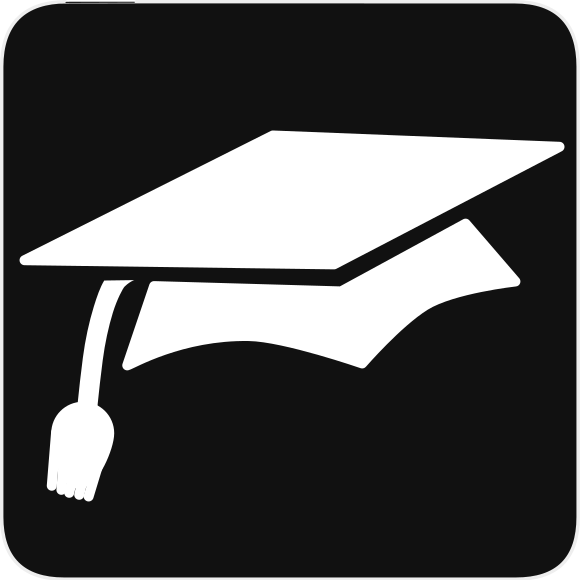
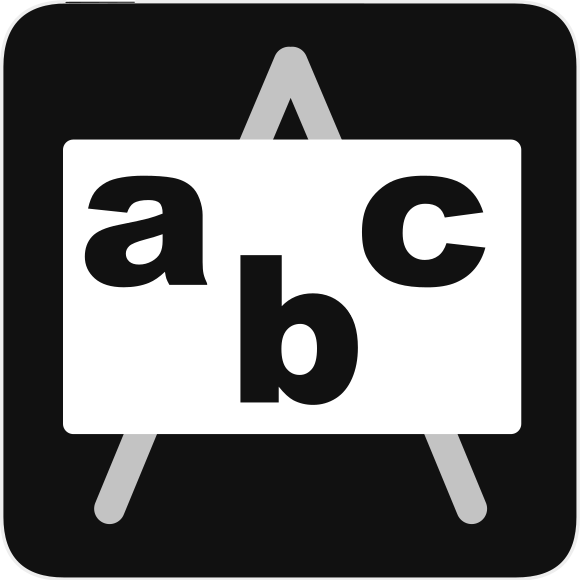

In [13]:
mapa = folium.Map(location=[-7.03, -37.28], tiles='https://{s}.basemaps.cartocdn.com/rastertiles/voyager_nolabels/{z}/{x}/{y}{r}.png', attr='CartoDB.Voyager', zoom_start=14)

for amenity in amenities:
    for lat, lng in zip(lats[amenity], lngs[amenity]):
        folium.Marker(location=[lat,lng],popup=amenity,tooltip=amenity,
                  icon=folium.features.CustomIcon(concat(project_dir, 'icons', 'amenities', f'{amenity}.png'),icon_size=(15,15))).add_to(mapa)
mapa

In [ ]:
# 1. Web raster basemaps
# Service public info: https://carto.com/location-data-services/basemaps/ The structure of the URLs to call the service is the following: https://{s}.basemaps.cartocdn.com/{style}/{z}/{x}/{y}{scale}.png , where:

# {s}: one of the available subdomains, either [a,b,c,d]
# {z} : Zoom level. We support from 0 to 20 zoom levels in OSM tiling system.
# {x},{y}: Tile coordinates in OSM tiling system
# {scale}: OPTIONAL "@2x" for double resolution tiles
# {style}: Map style, possible value is one of:
# light_all,
# dark_all,
# light_nolabels,
# light_only_labels,
# dark_nolabels,
# dark_only_labels,
# rastertiles/voyager,
# rastertiles/voyager_nolabels,
# rastertiles/voyager_only_labels,
# rastertiles/voyager_labels_under